In [ ]:
import json
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Graph Learning/congress_network/congress_network_data.json', 'r') as f:
    data = json.load(f)

In [ ]:
data = data[0]

In [ ]:
data.keys()

dict_keys(['inList', 'inWeight', 'outList', 'outWeight', 'usernameList'])

In [28]:
inList = data["inList"]
inWeight = data["inWeight"]
outList = data["outList"]
outWeight = data["outWeight"]
usernameList = data["usernameList"]

In [29]:
member_party_mapping = {'SenatorBaldwin':'Democrat', 'SenJohnBarrasso': 'Republican', 'SenatorBennet': 'Democrat', 'MarshaBlackburn': 'Republican',
                        'SenBlumenthal': 'Democrat', 'RoyBlunt': 'Republican', 'CoryBooker': 'Democrat', 'JohnBoozman': 'Republican', 'SenatorBraun': 'Republican',
                        'SenSherrodBrown': 'Democrat', 'SenatorCantwell': 'Democrat','SenCapito': 'Republican','SenatorCardin': 'Democrat','SenatorCarper': 'Democrat',
                        'SenBobCasey': 'Democrat','SenBillCassidy': 'Republican','ChrisCoons': 'Democrat','JohnCornyn': 'Republican','SenCortezMasto': 'Democrat',
                        'SenTomCotton': 'Republican','SenKevinCramer': 'Republican','MikeCrapo': 'Republican','SenTedCruz': 'Republican','SteveDaines': 'Republican',
                        'SenDuckworth': 'Democrat','SenatorDurbin': 'Democrat','SenJoniErnst': 'Republican','SenFeinstein': 'Democrat','SenatorFischer': 'Republican',
                        'SenGillibrand': 'Democrat','LindseyGrahamSC': 'Republican','ChuckGrassley': 'Republican','SenatorHagerty': 'Republican','SenatorHassan': 'Democrat',
                        'HawleyMO': 'Republican','MartinHeinrich': 'Democrat','SenatorHick': 'Democrat','maziehirono': 'Democrat','SenJohnHoeven': 'Republican',
                        'SenHydeSmith': 'Republican','JimInhofe': 'Republican','SenRonJohnson': 'Republican','timkaine': 'Democrat','SenMarkKelly': 'Democrat',
                        'SenJohnKennedy': 'Republican','SenAngusKing': 'Democrat','SenAmyKlobuchar': 'Democrat','SenatorLankford': 'Republican','SenatorLeahy': 'Democrat',
                        'SenMikeLee': 'Republican','SenatorLujan': 'Democrat','SenLummis': 'Republican','Sen_JoeManchin': 'Democrat','SenMarkey': 'Democrat',
                        'SenatorMenendez': 'Democrat','SenJeffMerkley': 'Democrat','JerryMoran': 'Republican','lisamurkowski': 'Republican','ChrisMurphyCT': 'Democrat',
                        'PattyMurray': 'Democrat','ossoff': 'Democrat','SenAlexPadilla': 'Democrat','RandPaul': 'Republican','SenGaryPeters': 'Democrat',
                        'senrobportman': 'Republican','SenJackReed': 'Democrat','SenatorRisch': 'Republican','SenatorRomney': 'Republican','SenJackyRosen': 'Democrat',
                        'marcorubio': 'Republican','SenSanders': 'Democrat','SenSchumer': 'Democrat','SenRickScott': 'Republican','SenatorTimScott': 'Republican',
                        'SenatorShaheen': 'Democrat','SenatorSinema': 'Democrat','SenTinaSmith': 'Democrat','SenStabenow': 'Democrat','SenDanSullivan': 'Republican',
                        'SenatorTester': 'Democrat','SenJohnThune': 'Republican','SenThomTillis': 'Republican','SenToomey': 'Republican','SenTuberville': 'Republican',
                        'ChrisVanHollen': 'Democrat','MarkWarner': 'Democrat','SenatorWarnock': 'Democrat','SenWarren': 'Democrat','SenWhitehouse': 'Democrat',
                        'SenatorWicker': 'Republican','RonWyden': 'Democrat','SenToddYoung': 'Republican','RepAdams': 'Democrat','Robert_Aderholt': 'Republican',
                        'RepPeteAguilar': 'Democrat','RepRickAllen': 'Republican','RepColinAllred': 'Democrat','RepArmstrongND': 'Republican','RepArrington': 'Republican',
                        'RepAuchincloss': 'Democrat','RepCindyAxne': 'Democrat','RepBrianBabin': 'Republican','RepDonBacon': 'Republican','RepJimBaird': 'Republican',
                        'RepBalderson': 'Republican','RepJimBanks': 'Republican','RepAndyBarr': 'Republican','RepBarragan': 'Democrat','RepKarenBass': 'Democrat',
                        'RepBeatty': 'Democrat','RepBera': 'Democrat','RepDonBeyer': 'Democrat','RepBice': 'Republican','RepAndyBiggsAZ': 'Republican',
                        'RepGusBilirakis': 'Republican','SanfordBishop': 'Democrat','RepDanBishop': 'Republican','RepLBR': 'Democrat','RepBoebert': 'Republican',
                        'RepBonamici': 'Democrat','RepBost': 'Republican','RepBourdeaux': 'Democrat','RepBowman': 'Democrat','CongBoyle': 'Democrat',
                        'RepKevinBrady': 'Republican','RepMoBrooks': 'Republican','RepAnthonyBrown': 'Democrat','RepShontelBrown': 'Democrat',
                        'RepBrownley': 'Democrat','VernBuchanan': 'Republican','RepKenBuck': 'Republican','RepLarryBucshon': 'Republican',
                        'RepTedBudd': 'Republican','RepTimBurchett': 'Republican','michaelcburgess': 'Republican','RepCori': 'Democrat','RepCheri': 'Democrat',
                        'RepKatCammack': 'Republican','RepCarbajal': 'Democrat','RepCardenas': 'Democrat','RepMikeCarey': 'Republican','RepJerryCarl': 'Republican',
                        'RepAndreCarson': 'Democrat','RepBuddyCarter': 'Republican','JudgeCarter': 'Republican','RepTroyCarter': 'Democrat',
                        'RepEdCase': 'Democrat','RepCasten': 'Democrat','USRepKCastor': 'Democrat','JoaquinCastrotx': 'Democrat','RepCawthorn': 'Republican',
                        'RepSteveChabot': 'Republican','RepLizCheney': 'Republican','CongresswomanSC': 'Republican','RepJudyChu': 'Democrat',
                        'RepKClark': 'Democrat','RepYvetteClarke': 'Democrat','repcleaver': 'Democrat','RepBenCline': 'Republican','RepCloudTX': 'Republican',
                        'WhipClyburn': 'Democrat','Rep_Clyde': 'Republican','RepCohen': 'Democrat','TomColeOK04': 'Republican','RepJamesComer': 'Republican',
                        'GerryConnolly': 'Democrat','RepLouCorrea': 'Democrat','RepJimCosta': 'Democrat','RepJoeCourtney': 'Democrat','RepAngieCraig': 'Democrat',
                        'RepCharlieCrist': 'Democrat','RepJasonCrow': 'Democrat','RepJohnCurtis': 'Republican','RepDavids': 'Democrat','WarrenDavidson': 'Republican',
                        'RodneyDavis': 'Republican','RepDean': 'Democrat','RepPeterDeFazio': 'Democrat','RepDianaDeGette': 'Democrat','rosadelauro': 'Democrat',
                        'RepDelBene': 'Democrat','repdelgado': 'Democrat','RepValDemings': 'Democrat','RepDeSaulnier': 'Democrat','RepTedDeutch': 'Democrat',
                        'MarioDB': 'Republican','RepDebDingell': 'Democrat','RepLloydDoggett': 'Democrat','RepDonaldsPress': 'Republican',
                        'USRepMikeDoyle': 'Democrat','RepJeffDuncan': 'Republican','DrNealDunnFL2': 'Republican','RepTomEmmer': 'Republican',
                        'RepEscobar': 'Democrat','RepAnnaEshoo': 'Democrat','RepEspaillat': 'Democrat','RepRonEstes': 'Republican','RepDwightEvans': 'Democrat',
                        'RepPatFallon': 'Republican','RepFeenstra': 'Republican','RepDrewFerguson': 'Republican','RepFischbach': 'Republican',
                        'RepBrianFitz': 'Republican','RepChuck': 'Republican','RepFletcher': 'Democrat','RepBillFoster': 'Democrat','virginiafoxx': 'Republican',
                        'RepLoisFrankel': 'Democrat','RepFranklin': 'Democrat','RepRussFulcher': 'Republican','RepMattGaetz': 'Republican',
                        'RepGallagher': 'Republican','RepRubenGallego': 'Democrat','RepGaramendi': 'Democrat','RepGarbarino': 'Republican',
                        'RepChuyGarcia': 'Democrat','RepMikeGarcia': 'Republican','RepSylviaGarcia': 'Democrat','RepBobGibbs': 'Republican',
                        'RepCarlos': 'Republican','replouiegohmert': 'Republican','RepGolden': 'Democrat','RepJimmyGomez': 'Democrat','RepTonyGonzales': 'Republican',
                        'RepJenniffer': 'Republican','RepGonzalez': 'Democrat','RepBobGood': 'Republican','Lancegooden': 'Republican','RepGosar': 'Republican',
                        'RepJoshG': 'Democrat','RepKayGranger': 'Republican','RepGarretGraves': 'Republican','RepAlGreen': 'Democrat','RepMarkGreen': 'Republican',
                        'RepMTG': 'Republican','RepMGriffith': 'Republican','RepRaulGrijalva': 'Democrat','RepGrothman': 'Republican',
                        'RepMichaelGuest': 'Republican','RepGuthrie': 'Republican','RepJoshHarder': 'Democrat','RepHarshbarger': 'Republican',
                        'RepHartzler': 'Republican','RepJahanaHayes': 'Democrat','repkevinhern': 'Republican','RepHerrell': 'Republican',
                        'CongressmanHice': 'Republican','RepBrianHiggins': 'Democrat','RepClayHiggins': 'Republican','RepFrenchHill': 'Republican',
                        'jahimes': 'Democrat','RepAshleyHinson': 'Republican','RepHorsford': 'Democrat','RepHoulahan': 'Democrat','LeaderHoyer': 'Democrat',
                        'RepRichHudson': 'Republican','RepHuffman': 'Democrat','RepHuizenga': 'Republican','repdarrellissa': 'Republican',
                        'JacksonLeeTX18': 'Democrat','RepRonnyJackson': 'Republican','RepJacobs': 'Republican','RepSaraJacobs': 'Democrat',
                        'RepJayapal': 'Democrat','RepJeffries': 'Democrat','RepBillJohnson': 'Republican','RepDustyJohnson': 'Republican',
                        'RepEBJ': 'Democrat','RepHankJohnson': 'Democrat','RepMikeJohnson': 'Republican','RepMondaire': 'Democrat','Jim_Jordan': 'Republican',
                        'RepDaveJoyce': 'Republican','RepJohnJoyce': 'Republican','RepJohnKatko': 'Republican','USRepKeating': 'Democrat',
                        'RepFredKeller': 'Republican','MikeKellyPA': 'Republican','RepRobinKelly': 'Democrat','RepRoKhanna': 'Democrat','RepDanKildee': 'Democrat',
                        'RepDerekKilmer': 'Democrat','RepAndyKimNJ': 'Democrat','RepYoungKim': 'Republican','RepRonKind': 'Democrat',
                        'RepKirkpatrick': 'Democrat','CongressmanRaja': 'Democrat','RepAnnieKuster': 'Democrat','RepDavidKustoff': 'Republican',
                        'RepLaHood': 'Republican','RepLaMalfa': 'Republican','JimLangevin': 'Democrat','RepRickLarsen': 'Democrat','RepJohnLarson': 'Democrat',
                        'boblatta': 'Republican','RepLaTurner': 'Republican','RepLawrence': 'Democrat','RepAlLawsonJr': 'Democrat','RepBarbaraLee': 'Democrat',
                        'RepSusieLee': 'Democrat','RepTeresaLF': 'Democrat','RepDLesko': 'Republican','RepJuliaLetlow': 'Republican','RepAndyLevin': 'Democrat',
                        'RepMikeLevin': 'Democrat','RepTedLieu': 'Democrat','USRepLong': 'Republican','RepLoudermilk': 'Republican','RepLowenthal': 'Democrat',
                        'RepFrankLucas': 'Republican','RepBlaine': 'Republican','RepElaineLuria': 'Democrat','RepNancyMace': 'Republican','RepMalinowski': 'Democrat',
                        'RepMalliotakis': 'Republican','RepMaloney': 'Democrat','RepSeanMaloney': 'Democrat','RepKManning': 'Democrat','RepThomasMassie': 'Republican',
                        'RepBrianMast': 'Republican','DorisMatsui': 'Democrat','RepLucyMcBath': 'Democrat','GOPLeader': 'Republican','RepMcCaul': 'Republican',
                        'RepLisaMcClain': 'Republican','BettyMcCollum04': 'Democrat','RepMcEachin': 'Democrat','RepMcGovern': 'Democrat','PatrickMcHenry': 'Republican',
                        'RepMcKinley': 'Republican','RepGregoryMeeks': 'Democrat','RepMeijer': 'Republican','RepGraceMeng': 'Democrat','RepMeuser': 'Republican',
                        'RepKweisiMfume': 'Democrat','RepMMM': 'Republican','RepCarolMiller': 'Republican','RepMaryMiller': 'Republican','RepAlexMooney': 'Republican',
                        'RepBarryMoore': 'Republican','RepBlakeMoore': 'Republican','RepGwenMoore': 'Democrat','RepJoeMorelle': 'Democrat','RepMullin': 'Democrat',
                        'RepGregMurphy': 'Republican','RepStephMurphy': 'Democrat','RepJerryNadler': 'Democrat','gracenapolitano': 'Democrat',
                        'RepRichardNeal': 'Democrat','RepJoeNeguse': 'Democrat','RepTroyNehls': 'Republican','RepNewhouse': 'Republican','RepMarieNewman': 'Democrat',
                        'DonaldNorcross': 'Democrat','RepRalphNorman': 'Republican','EleanorNorton': 'Democrat','RepOHalleran': 'Democrat','JayObernolte': 'Republican',
                        'Ilhan': 'Democrat','RepBurgessOwens': 'Republican','CongPalazzo': 'Republican','FrankPallone': 'Democrat','USRepGaryPalmer': 'Republican',
                        'RepJimmyPanetta': 'Democrat','RepChrisPappas': 'Democrat','BillPascrell': 'Democrat','RepDonaldPayne': 'Democrat',
                        'SpeakerPelosi': 'Democrat','RepPerlmutter': 'Democrat','RepScottPeters': 'Democrat','RepPfluger': 'Republican',
                        'RepDeanPhillips': 'Democrat','chelliepingree': 'Democrat','StaceyPlaskett': 'Democrat','repmarkpocan': 'Democrat',
                        'RepKatiePorter': 'Democrat','RepPressley': 'Democrat','RepDavidEPrice': 'Democrat','RepMikeQuigley': 'Democrat','RepRaskin': 'Democrat',
                        'GReschenthaler': 'Republican','RepKathleenRice': 'Democrat','RepTomRice': 'Republican','cathymcmorris': 'Republican',
                        'RepMikeRogersAL': 'Republican','RepJohnRose': 'Republican','RepRosendale': 'Republican','RepDeborahRoss': 'Democrat','RepDavidRouzer': 'Republican',
                        'RepChipRoy': 'Republican','RepRoybalAllard': 'Democrat','RepRaulRuizMD': 'Republican','Call_Me_Dutch': 'Democrat','RepBobbyRush': 'Democrat',
                        'RepTimRyan': 'Democrat','Kilili_Sablan': 'Democrat','RepMariaSalazar': 'Republican','RepLindaSanchez': 'Democrat','RepSarbanes': 'Democrat',
                        'SteveScalise': 'Republican','RepMGS': 'Democrat','janschakowsky': 'Democrat','RepAdamSchiff': 'Democrat','RepSchneider': 'Democrat',
                        'RepSchrader': 'Democrat','RepKimSchrier': 'Democrat','RepDavid': 'Republican','AustinScottGA08': 'Republican','BobbyScott': 'Democrat',
                        'PeteSessions': 'Republican','RepTerriSewell': 'Democrat','BradSherman': 'Democrat','RepSherrill': 'Democrat','CongMikeSimpson': 'Republican',
                        'RepSires': 'Democrat','RepSlotkin': 'Democrat','RepAdamSmith': 'Democrat','RepAdrianSmith': 'Republican','RepJasonSmith': 'Republican',
                        'RepSmucker': 'Republican','RepDarrenSoto': 'Democrat','RepSpanberger': 'Democrat','RepSpartz': 'Republican','RepSpeier': 'Democrat',
                        'Rep_Stansbury': 'Democrat','RepGregStanton': 'Democrat','RepPeteStauber': 'Republican','RepSteel': 'Republican','RepStefanik': 'Republican',
                        'RepBryanSteil': 'Republican','RepGregSteube': 'Republican','RepHaleyStevens': 'Democrat','RepChrisStewart': 'Republican',
                        'RepStricklandWA': 'Democrat','RepTomSuozzi': 'Democrat','RepSwalwell': 'Democrat','RepMarkTakano': 'Democrat','claudiatenney': 'Republican',
                        'BennieGThompson': 'Democrat','RepThompson': 'Democrat','RepTiffany': 'Republican','RepTimmons': 'Republican','repdinatitus': 'Democrat',
                        'RepRashida': 'Democrat','RepPaulTonko': 'Democrat','NormaJTorres': 'Democrat','RepRitchie': 'Democrat','RepLoriTrahan': 'Democrat',
                        'RepDavidTrone': 'Democrat','RepMikeTurner': 'Republican','RepUnderwood': 'Democrat','RepDavidValadao': 'Republican',
                        'RepBethVanDuyne': 'Republican','RepJuanVargas': 'Democrat','RepVeasey': 'Democrat','NydiaVelazquez': 'Democrat',
                        'RepAnnWagner': 'Republican','RepWalberg': 'Republican','RepWalorski': 'Republican','michaelgwaltz': 'Republican',
                        'RepDWStweets': 'Democrat','RepBonnie': 'Democrat','RepWebster': 'Republican','PeterWelch': 'Democrat','RepWesterman': 'Republican',
                        'RepWexton': 'Democrat','RepSusanWild': 'Democrat','RepNikema': 'Democrat','RepRWilliams': 'Republican','RepWilson': 'Democrat',
                        'RepJoeWilson': 'Republican','RobWittman': 'Republican','rep_stevewomack': 'Republican','RepJohnYarmuth': 'Democrat',
                        'RepLeeZeldin': 'Republican'}

In [30]:
set(list(member_party_mapping.values()))

{'Democrat', 'Republican'}

In [31]:
party_color_mapping = {'Democrat': 'blue',
                       'Republican': 'red'}

In [32]:
import networkx as nx

G = nx.DiGraph()

for user in usernameList:
  party = member_party_mapping.get(user)
  G.add_node(user, party=party)

In [33]:
for i, targets in enumerate(outList):
    user = usernameList[i]
    for target_idx in targets:
        target = usernameList[target_idx]
        if user in G.nodes and target in G.nodes:
            G.add_edge(user, target)

KeyboardInterrupt: 

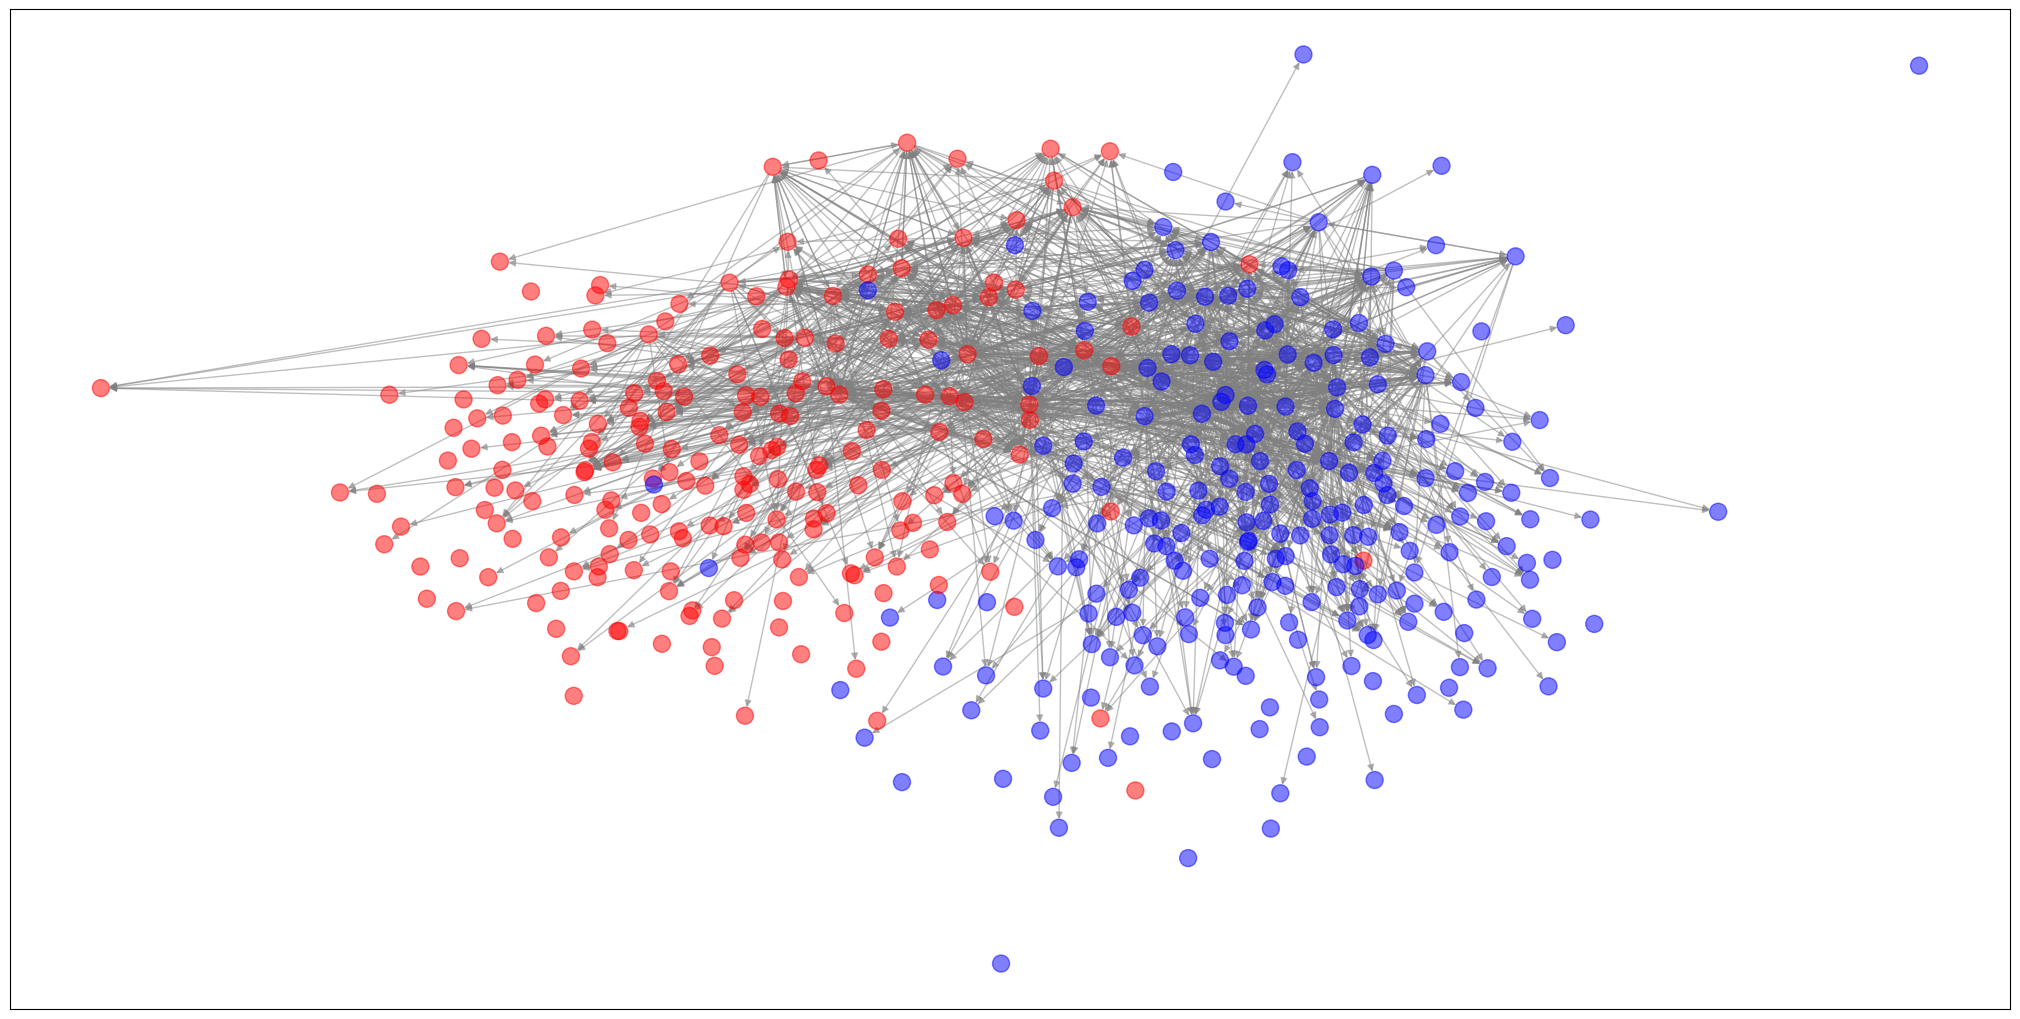

In [34]:
node_colors = [party_color_mapping[member_party_mapping[node]] for node in G.nodes]

plt.figure(figsize=(20, 10))
nx.draw(G, with_labels=False, node_color=node_colors, edge_color="gray", node_size=150, alpha=0.5, font_color = "black")
plt.show()

In [ ]:
plt.savefig('congress_network.jpg')

<Figure size 640x480 with 0 Axes>

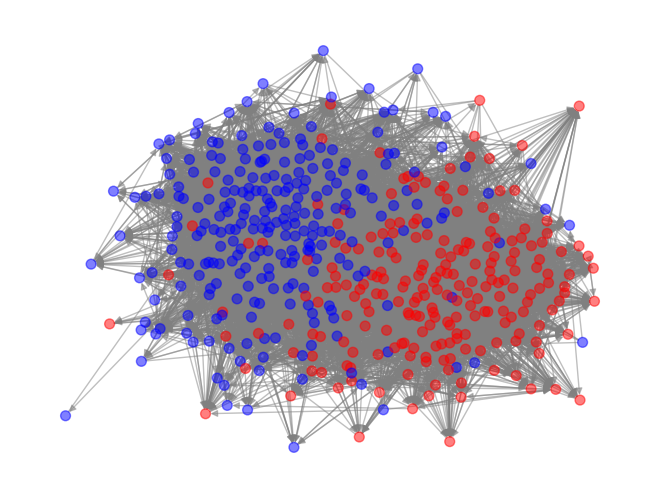

In [ ]:
pos = nx.spring_layout(G, k=0.5)  # Adjust `k` for spacing
nx.draw(G, pos, with_labels=False, node_color=node_colors, edge_color="gray", alpha=0.5, node_size=50)

In [35]:
G.number_of_nodes()

475

In [36]:
G.number_of_edges()

13289

In [37]:
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

In [38]:
degree_centrality

{'SenatorBaldwin': 0.0970464135021097,
 'SenJohnBarrasso': 0.08649789029535865,
 'SenatorBennet': 0.11603375527426159,
 'MarshaBlackburn': 0.1181434599156118,
 'SenBlumenthal': 0.1371308016877637,
 'RoyBlunt': 0.04852320675105485,
 'CoryBooker': 0.04852320675105485,
 'JohnBoozman': 0.11392405063291139,
 'SenatorBraun': 0.1371308016877637,
 'SenSherrodBrown': 0.13291139240506328,
 'SenatorCantwell': 0.056962025316455694,
 'SenCapito': 0.10759493670886075,
 'SenatorCardin': 0.13080168776371306,
 'SenatorCarper': 0.09071729957805906,
 'SenBobCasey': 0.10759493670886075,
 'SenBillCassidy': 0.12025316455696201,
 'ChrisCoons': 0.08016877637130801,
 'JohnCornyn': 0.25949367088607594,
 'SenCortezMasto': 0.09493670886075949,
 'SenTomCotton': 0.06329113924050632,
 'SenKevinCramer': 0.08860759493670885,
 'MikeCrapo': 0.08860759493670885,
 'SenTedCruz': 0.1371308016877637,
 'SteveDaines': 0.10759493670886075,
 'SenDuckworth': 0.1582278481012658,
 'SenatorDurbin': 0.17088607594936708,
 'SenJoniErns

In [39]:
nx.set_node_attributes(G, degree_centrality, name="degree_centrality")
nx.set_node_attributes(G, betweenness_centrality, name="betweenness_centrality")
nx.set_node_attributes(G, closeness_centrality, name="closeness_centrality")

In [40]:
class_labels = []
for node in G.nodes():
  party = G.nodes[node]['party']
  if party == 'Democrat':
    class_labels.append(0)
  else:
    class_labels.append(1)

In [41]:
class_labels

[0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,


In [42]:
edge_list = list(G.edges())

In [43]:
edge_list

[('SenatorBaldwin', 'SenBlumenthal'),
 ('SenatorBaldwin', 'SenatorCardin'),
 ('SenatorBaldwin', 'SenCortezMasto'),
 ('SenatorBaldwin', 'SenatorDurbin'),
 ('SenatorBaldwin', 'LindseyGrahamSC'),
 ('SenatorBaldwin', 'SenAmyKlobuchar'),
 ('SenatorBaldwin', 'SenJeffMerkley'),
 ('SenatorBaldwin', 'ChrisMurphyCT'),
 ('SenatorBaldwin', 'PattyMurray'),
 ('SenatorBaldwin', 'SenatorShaheen'),
 ('SenatorBaldwin', 'SenTinaSmith'),
 ('SenatorBaldwin', 'SenStabenow'),
 ('SenatorBaldwin', 'MarkWarner'),
 ('SenatorBaldwin', 'SenatorWarnock'),
 ('SenatorBaldwin', 'SenWarren'),
 ('SenatorBaldwin', 'RepJudyChu'),
 ('SenatorBaldwin', 'RepJoeCourtney'),
 ('SenatorBaldwin', 'RepGwenMoore'),
 ('SenatorBaldwin', 'repmarkpocan'),
 ('SenatorBaldwin', 'janschakowsky'),
 ('SenJohnBarrasso', 'SenCapito'),
 ('SenJohnBarrasso', 'SenBillCassidy'),
 ('SenJohnBarrasso', 'JohnCornyn'),
 ('SenJohnBarrasso', 'SenKevinCramer'),
 ('SenJohnBarrasso', 'MikeCrapo'),
 ('SenJohnBarrasso', 'LindseyGrahamSC'),
 ('SenJohnBarrasso', 

In [45]:
node_mapping = {node: idx for idx, node in enumerate(G.nodes())}

In [46]:
node_mapping

{'SenatorBaldwin': 0,
 'SenJohnBarrasso': 1,
 'SenatorBennet': 2,
 'MarshaBlackburn': 3,
 'SenBlumenthal': 4,
 'RoyBlunt': 5,
 'CoryBooker': 6,
 'JohnBoozman': 7,
 'SenatorBraun': 8,
 'SenSherrodBrown': 9,
 'SenatorCantwell': 10,
 'SenCapito': 11,
 'SenatorCardin': 12,
 'SenatorCarper': 13,
 'SenBobCasey': 14,
 'SenBillCassidy': 15,
 'ChrisCoons': 16,
 'JohnCornyn': 17,
 'SenCortezMasto': 18,
 'SenTomCotton': 19,
 'SenKevinCramer': 20,
 'MikeCrapo': 21,
 'SenTedCruz': 22,
 'SteveDaines': 23,
 'SenDuckworth': 24,
 'SenatorDurbin': 25,
 'SenJoniErnst': 26,
 'SenFeinstein': 27,
 'SenatorFischer': 28,
 'SenGillibrand': 29,
 'LindseyGrahamSC': 30,
 'ChuckGrassley': 31,
 'SenatorHagerty': 32,
 'SenatorHassan': 33,
 'HawleyMO': 34,
 'MartinHeinrich': 35,
 'SenatorHick': 36,
 'maziehirono': 37,
 'SenJohnHoeven': 38,
 'SenHydeSmith': 39,
 'JimInhofe': 40,
 'SenRonJohnson': 41,
 'timkaine': 42,
 'SenMarkKelly': 43,
 'SenJohnKennedy': 44,
 'SenAngusKing': 45,
 'SenAmyKlobuchar': 46,
 'SenatorLank

In [47]:
numerical_edge_list = [[node_mapping[source], node_mapping[target]] for source, target in edge_list]

In [54]:
numerical_edge_list

[[0, 4],
 [0, 12],
 [0, 18],
 [0, 25],
 [0, 30],
 [0, 46],
 [0, 55],
 [0, 58],
 [0, 59],
 [0, 74],
 [0, 76],
 [0, 77],
 [0, 85],
 [0, 86],
 [0, 87],
 [0, 154],
 [0, 168],
 [0, 341],
 [0, 374],
 [0, 401],
 [1, 11],
 [1, 15],
 [1, 17],
 [1, 20],
 [1, 21],
 [1, 30],
 [1, 39],
 [1, 51],
 [1, 52],
 [1, 66],
 [1, 72],
 [1, 80],
 [1, 89],
 [1, 142],
 [1, 190],
 [1, 192],
 [1, 426],
 [1, 428],
 [1, 459],
 [2, 9],
 [2, 18],
 [2, 24],
 [2, 36],
 [2, 37],
 [2, 42],
 [2, 64],
 [2, 68],
 [2, 73],
 [2, 77],
 [2, 85],
 [2, 90],
 [2, 91],
 [2, 102],
 [2, 130],
 [2, 162],
 [2, 171],
 [2, 178],
 [2, 189],
 [2, 349],
 [2, 368],
 [2, 374],
 [3, 4],
 [3, 8],
 [3, 17],
 [3, 22],
 [3, 32],
 [3, 38],
 [3, 39],
 [3, 47],
 [3, 50],
 [3, 58],
 [3, 62],
 [3, 68],
 [3, 72],
 [3, 81],
 [3, 83],
 [3, 87],
 [3, 92],
 [3, 111],
 [3, 113],
 [3, 126],
 [3, 165],
 [3, 190],
 [3, 203],
 [3, 226],
 [3, 242],
 [3, 246],
 [3, 288],
 [3, 327],
 [3, 335],
 [3, 341],
 [3, 349],
 [3, 385],
 [3, 401],
 [3, 409],
 [3, 435],
 [3, 4

In [ ]:
# to do
data = Data(x=data_x, y=data_y, edge_index=edge_index, edge_attr=data_edge_attr, train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)

<ipython-input-59-d0792f5ba98c>:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


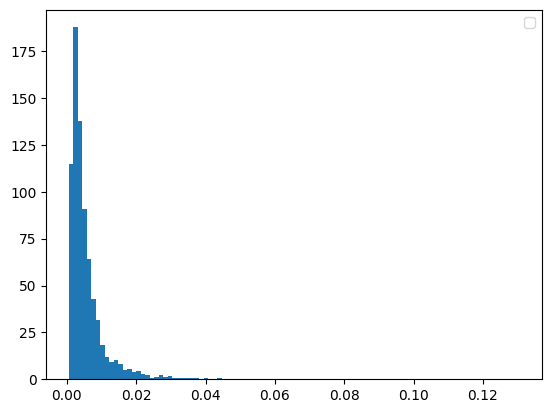

In [59]:
import json
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import lognorm

data = data

inList = data['inList']
inWeight = data['inWeight']
outList = data['outList']
outWeight = data['outWeight']
usernameList = data['usernameList']

all_weights = []
for single_node_weights in outWeight:
    all_weights.extend(single_node_weights)

n, bins, patches = plt.hist(all_weights, bins=100, density = True)

# best fit of data for lognorm distribution
s, loc, scale=lognorm.fit(all_weights,floc=0.0)

x=np.linspace(0,0.14,10000)
y=lognorm.pdf(x,s, loc=loc, scale=scale)
#plt.plot(x,y,label='lognorm',linewidth=4)

plt.legend()